In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Activation
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, TensorBoard
import Eval_model as eva

In [2]:
def get_1DCNN(x_train, y_train, x_test, y_test, epochs = 50):
    
    model = Sequential()
    
    model.add(Conv1D(16, 3, activation = 'relu', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(32, 3, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(64, 3, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    callback = [EarlyStopping(monitor = 'val_loss', patience = 20),
                ModelCheckpoint(filepath ='1DCNN_best_model.h5', monitor = 'val_loss', save_best_only = True)]
    
   #callback = [TensorBoard]
    
    history = model.fit(x_train, y_train, 
                        batch_size = 32, 
                        epochs = epochs, 
                        callbacks = callback, 
                        validation_data = (x_test, y_test))
    
    return history, model

def InputPreprocess(x_train, y_train, x_test, y_test):
    #reshape x
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] , 1))
    x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    y_true = y_test
    #reshape y 
    y_test = to_categorical(y_test, 4, dtype = 'int8')
    y_train = to_categorical(y_train, 4, dtype = 'int8')
    
    return x_train, y_train, x_test, y_test, y_true

In [3]:
import pickle
train = pickle.load(open('train_med_amp.pk1', 'rb'))
test = pickle.load(open('test_med_amp.pk1', 'rb'))
x_train = []
y_train = []

for lb, sg in train:
    x_train.append(sg)
    y_train.append(lb)

x_train = np.array(x_train).astype('float32')
y_train = np.array(y_train).astype('int8')

x_test = []
y_test = []
for lb, sg in test:
    x_test.append(sg)
    y_test.append(lb)

x_test = np.array(x_test).astype('float32')
y_test = np.array(y_test).astype('int8')

In [4]:
x_train, y_train, x_test, y_test, y_true = InputPreprocess(x_train, y_train, x_test, y_test)

In [5]:
history, model = get_1DCNN(x_train, y_train, x_test, y_test)

Train on 8528 samples, validate on 300 samples
Epoch 1/50
8528/8528 [==============================] - 14s 2ms/sample - loss: 0.9885 - accuracy: 0.5950 - val_loss: 1.1808 - val_accuracy: 0.5100
Epoch 2/50
8528/8528 [==============================] - 3s 402us/sample - loss: 0.8795 - accuracy: 0.6217 - val_loss: 1.0003 - val_accuracy: 0.5867
Epoch 3/50
8528/8528 [==============================] - 4s 427us/sample - loss: 0.8544 - accuracy: 0.6314 - val_loss: 0.8979 - val_accuracy: 0.6300
Epoch 4/50
8528/8528 [==============================] - 4s 423us/sample - loss: 0.8359 - accuracy: 0.6419 - val_loss: 0.9371 - val_accuracy: 0.6033
Epoch 5/50
8528/8528 [==============================] - 4s 428us/sample - loss: 0.8168 - accuracy: 0.6479 - val_loss: 0.8369 - val_accuracy: 0.6500
Epoch 6/50
8528/8528 [==============================] - 4s 414us/sample - loss: 0.8003 - accuracy: 0.6548 - val_loss: 0.7912 - val_accuracy: 0.6833
Epoch 7/50
8528/8528 [==============================] - 3s 402us/s

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 178, 16)           64        
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 89, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 87, 32)            1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 87, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 43, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 64)            6

Accuracy = 92.00%
F1 score = 90.37
Sensitivity: Normal = 0.953, AFib = 0.920, Others = 0.829, Noise = 0.967
Specificity: Normal = 0.940, AFib = 0.996, Others = 0.983, Noise = 0.963
Positive predictive value: Normal = 0.941, AFib = 0.979, Others = 0.935, Noise = 0.744
Negative predictive value: Normal = 0.953, AFib = 0.984, Others = 0.950, Noise = 0.996
Confusion matrix, without normalization


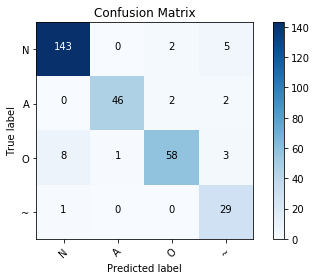

Normalized confusion matrix


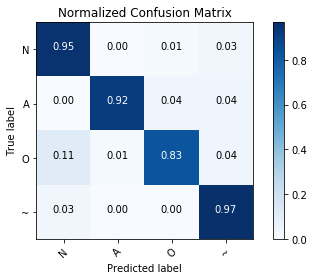

In [7]:
eva.get_summary(x_test, y_true, model)

Accuracy: 92.00%


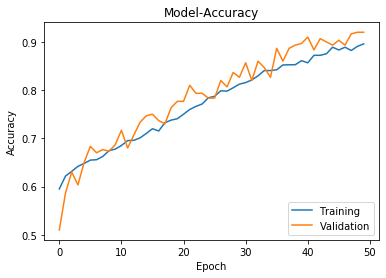

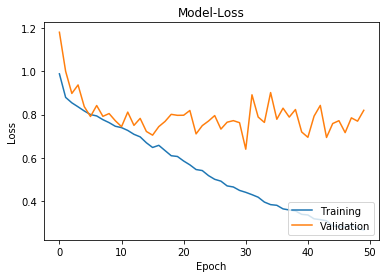

In [8]:
eva.Plot_Acc_and_Loss(history, x_test, y_test, model)